# getting value out of natural text 

## Libraries 

In [5]:
import nltk # underlying library NLP tools 
from nltk.tokenize import word_tokenize # check nltk is downloaded 
import pandas as pd # for data handling 
import docx2txt # for pulling data from a word doc
from textblob import TextBlob # for sentiment analysis 
import matplotlib.pyplot as plt # visualisation

## Activity 1 - summarise a news article 
- get our text document 

In [11]:
ourfile=docx2txt.process("Horseracing.docx")

In [12]:
tokens=word_tokenize(ourfile)

In [14]:
tokens_lower=[token.lower() for token in tokens]

In [15]:
tokens_lower

['thousands',
 'of',
 'racehorses',
 'are',
 'being',
 'sent',
 'to',
 'slaughterhouses',
 'in',
 'britain',
 'and',
 'ireland',
 ',',
 'a',
 'bbc',
 'panorama',
 'investigation',
 'has',
 'found',
 '.',
 'some',
 'of',
 'the',
 'slaughtered',
 'animals',
 'were',
 'once',
 'owned',
 'and',
 'trained',
 'by',
 'some',
 'of',
 'the',
 'biggest',
 'names',
 'in',
 'racing',
 '.',
 'covert',
 'recording',
 'also',
 'showed',
 'how',
 'rules',
 'designed',
 'to',
 'protect',
 'horses',
 'from',
 'a',
 'cruel',
 'death',
 'appear',
 'to',
 'be',
 'regularly',
 'ignored',
 'at',
 'one',
 'of',
 'the',
 'uk',
 "'s",
 'biggest',
 'abattoirs',
 '.',
 'the',
 'abattoir',
 'told',
 'the',
 'bbc',
 'it',
 'did',
 'not',
 'accept',
 'any',
 'form',
 'of',
 'animal',
 'abuse',
 '.',
 'one',
 'expert',
 'described',
 'the',
 'covert',
 'footage',
 ',',
 'from',
 'cameras',
 'installed',
 'by',
 'the',
 'campaign',
 'group',
 'animal',
 'aid',
 ',',
 'as',
 'evidence',
 'of',
 'clear',
 'breaches',
 '

In [16]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

### word frequency summary 

In [17]:
len(tokens_lower)

1155

In [27]:
# remove punctuation
clean_tokens_lower=[word for word in tokens_lower if word.isalpha()]

In [28]:
#remove stopwords
from nltk.corpus import stopwords

In [29]:
stop_words=stopwords.words('english')

In [30]:
clean_tokens_lower_without_stop=[word for word in clean_tokens_lower if not word in stop_words]

In [31]:
len(clean_tokens_lower_without_stop)

513

In [32]:
#rename the variable 
new_words=clean_tokens_lower_without_stop

In [33]:
freqdist2=nltk.FreqDist(new_words)

In [34]:
word_freq2=dict((word,freq) for word, freq in freqdist2.items() if not word.isdigit())

In [35]:
sorted_word_freq2=sorted(word_freq2.items(), key=lambda x:x[1], reverse=True)

In [48]:
sorted_word_freq2

[('said', 18),
 ('horses', 14),
 ('racing', 13),
 ('horse', 11),
 ('ireland', 8),
 ('animal', 8),
 ('footage', 8),
 ('panorama', 6),
 ('animals', 6),
 ('aid', 6),
 ('abattoir', 5),
 ('cameras', 5),
 ('regulations', 5),
 ('elliott', 5),
 ('killed', 5),
 ('racehorses', 4),
 ('sent', 4),
 ('bbc', 4),
 ('trained', 4),
 ('also', 4),
 ('one', 4),
 ('welfare', 4),
 ('going', 4),
 ('slaughtered', 3),
 ('covert', 3),
 ('rules', 3),
 ('death', 3),
 ('told', 3),
 ('three', 3),
 ('industry', 3),
 ('recorded', 3),
 ('shot', 3),
 ('care', 3),
 ('euthanised', 3),
 ('prof', 3),
 ('mills', 3),
 ('got', 3),
 ('thousands', 2),
 ('slaughterhouses', 2),
 ('britain', 2),
 ('biggest', 2),
 ('showed', 2),
 ('designed', 2),
 ('protect', 2),
 ('appear', 2),
 ('abattoirs', 2),
 ('accept', 2),
 ('form', 2),
 ('abuse', 2),
 ('expert', 2),
 ('clear', 2),
 ('breaches', 2),
 ('gordon', 2),
 ('fate', 2),
 ('former', 2),
 ('end', 2),
 ('set', 2),
 ('drury', 2),
 ('sons', 2),
 ('young', 2),
 ('dene', 2),
 ('stansall', 2

### convert the list into an nltk text type 

In [38]:
from nltk.text import Text

In [39]:
nltktext=Text(new_words)

In [41]:
type(new_words)

list

In [40]:
type(nltktext)

nltk.text.Text

In [42]:
#collocations - words that appear next to eachother frequently 
nltktext.collocations()

animal aid; accept form; dene stansall; designed protect; drury sons;
four days; travelling miles; rules designed; former racehorses; gordon
elliott; prof mills; animal abuse; britain ireland; form animal;
racehorses slaughtered; told panorama; footage recorded; aid cameras;
horses industry; horses shot


In [47]:
# concordance - fragments containing key words - indexed - text around that word
nltktext.concordance("elliott")

Displaying 5 of 5 matches:
february picture top trainer gordon elliott sitting dead horse sent shockwaves 
sent shockwaves world racing beyond elliott trained three winners grand nationa
ousands pounds three trained gordon elliott stables county meath ireland told p
 racing due injury said care killed elliott said two horses sent horse dealer r
ime learned fate panorama contacted elliott said ensured appropriate proper tre


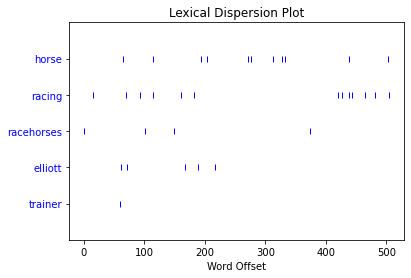

In [50]:
nltktext.dispersion_plot(['horse','racing','racehorses','elliott','trainer'])

## activity 2 - clothing reviews and sentiment 

In [52]:
clothingdf=pd.read_csv('Womens Clothing E-Commerce Reviews.csv')

In [53]:
clothingdf.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [55]:
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [58]:
clothingdf['Review Text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Absolutely wonderful - silky and sexy and comfortable
1                                                                                                                                                                                                             Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone w

In [ ]:
pd.set_option('display.max_colwidth', None) # setting so we can see full text 

In [59]:
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [60]:
clothingdf['Rating'].unique()

array([4, 5, 3, 2, 1])

In [65]:
TextBlob('hate restaurant awful').sentiment

Sentiment(polarity=-0.9, subjectivity=0.95)

In [66]:
TextBlob('this place is amazing. I am really happy i went there. delicious').sentiment

Sentiment(polarity=0.8000000000000002, subjectivity=0.9666666666666667)

In [74]:
TextBlob('the dress kinda fit').sentiment

Sentiment(polarity=0.4, subjectivity=0.4)

### clean our data for department, review analysis 

In [82]:
# remove nulls from departments, review text 
clothingdf['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend'],
      dtype=object)

In [80]:
clothingdf.dropna(subset=['Review Text','Department Name'], inplace=True)

In [81]:
clothingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22628 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               22628 non-null  int64 
 1   Clothing ID              22628 non-null  int64 
 2   Age                      22628 non-null  int64 
 3   Title                    19662 non-null  object
 4   Review Text              22628 non-null  object
 5   Rating                   22628 non-null  int64 
 6   Recommended IND          22628 non-null  int64 
 7   Positive Feedback Count  22628 non-null  int64 
 8   Division Name            22628 non-null  object
 9   Department Name          22628 non-null  object
 10  Class Name               22628 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.1+ MB


In [75]:
from nltk.stem import WordNetLemmatizer

In [76]:
# define a clean function 
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
        
    #joining
    return " ".join(text_cleaned)

In [83]:
# apply cleaning 
clothingdf["Review Text"] = clothingdf["Review Text"].apply(cleaning)
clothingdf["Review Text"].head()

0                                                                                                                                                                                                                                                                   absolutely wonderful silky sexy comfortable
1                                                                                                                          love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite
2    high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c
3                                                                                       

### sentiment analysis 

In [84]:
clothingdf['sentiment_score']=clothingdf['Review Text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [85]:
clothingdf['subjectivity_score']=clothingdf['Review Text'].apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [87]:
clothingdf.head(1)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,sentiment_score,subjectivity_score
0,0,767,33,NaN,absolutely wonderful silky sexy comfortable,4,1,0,Initmates,Intimate,Intimates,0.633333,0.933333


In [88]:
clothingdf.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,sentiment_score,subjectivity_score
count,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000
mean,11737.272097,919.695908,43.282880,4.183092,0.818764,2.631784,0.254709,0.562504
std,6781.574232,201.683804,12.328176,1.115911,0.385222,5.787520,0.173083,0.129350
min,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000,-0.800000,0.000000
25%,5868.750000,861.000000,34.000000,4.000000,1.000000,0.000000,0.145566,0.482103
50%,11727.500000,936.000000,41.000000,5.000000,1.000000,1.000000,0.250000,0.558333
75%,17617.250000,1078.000000,52.000000,5.000000,1.000000,3.000000,0.358333,0.637500
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,1.000000,1.000000


In [90]:
dep_group_by=clothingdf.groupby(['Department Name']).agg({'sentiment_score':'mean'})

In [91]:
dep_group_by

,sentiment_score
Department Name,
Bottoms,0.254660
Dresses,0.256698
Intimate,0.253214
Jackets,0.241503
Tops,0.255575
Trend,0.211939


## Example 3 spacy 

In [1]:
import spacy

In [3]:
nlp=spacy.load('en_core_web_sm')

In [6]:
tweets=pd.read_csv('ever_trump.csv')

In [7]:
tweets['created_at'].min()

'01-01-2015 07:02:39'

In [8]:
tweets['created_at'].max()

'12-31-2018 14:38:52'

In [9]:
tokens=nlp(''.join(str(tweets.text.tolist())))

In [10]:
len(tokens)

111808

In [14]:
type(nlp)

spacy.lang.en.English

In [13]:
tokens

['.@FoxNews is no longer the same. We miss the great Roger Ailes. You have more anti-Trump people by far than ever before. Looking for a new outlet! https://t.co/jXxsF0flUM', 'So the so-called HHS Whistleblower was against HYDROXYCHLOROQUINE. Then why did he make and sign an emergency use authorization? @NorahODonnell said “He shared his concerns with a reporter.” In other words he LEAKED. A dumb @60Minutes hit job on a grandstanding Never Trumper!', '.....mixed about even wanting us to get out. They make a fortune $$$ by having us stay and except at the beginning we never really fought to win. We are more of a police force than the mighty military that we are especially now as rebuilt. No I am not acting impulsively!', 'Wow! The Front Page @washingtonpost Headline reads “A BOOST IN TESTS BUT LACK OF TAKERS.” We have done a great job on Ventilators Testing and everything else. Were left little by Obama. Over 11 million tests and going up fast. More than all countries in the world combi

In [16]:
tokens_lower=[token.lower_ for token in tokens]

# notebook unfinished - errors with spacy module 